## Processing

Path to data files

In [ ]:
cache_data_path = "../dapi/insight-weather-cache"
data_path = "../dapi/insight-weather/records/"

In [2]:
!ls "../dapi/"

Find all the files

In [3]:
import pandas as pd

In [4]:
import os
import json

In [5]:
cache_data_files = os.listdir(cache_data_path)
data_files = os.listdir(data_path)

### Combine Datasets

In [6]:
data_files.sort(key=lambda x: int(x.split(".")[0]))

In [7]:
cache_data_files.sort()

In [8]:
def read_cache_data(file_path):
    
    with open(file_path, "r") as fp:
        res = json.load(fp)
    
    return res

Get all the records

In [9]:
all_records = []

for file_path in data_files:
    all_records.append(
        read_cache_data(os.path.join(data_path, file_path) )
    )
    

for file_path in cache_data_files:
    all_records.append(
        read_cache_data(os.path.join(cache_data_path, file_path) )
    )

Merge and remove duplicates

In [10]:
merged_records = {}

for record in all_records:
    
    merged_records = {
        **merged_records,
        **record
    }
    
del merged_records['sol_keys']
del merged_records['validity_checks']

In [11]:
merged_records.keys()

dict_keys(['84', '82', '83', '80', '81', '79', '78', '88', '86', '87', '85', '89', '90', '91', '92', '95', '94', '96', '97', '99', '98', '100', '101', '102', '103', '104', '106', '105', '107', '108', '113', '114', '115', '117', '116', '119', '118', '124', '125', '126', '127', '130', '128', '129', '131', '133', '132', '134', '136', '135', '137', '138', '139', '140', '141', '142', '143', '144', '145', '146', '147', '148', '149', '150', '151', '152', '153', '154', '155', '156', '157', '158', '159', '160', '161', '162', '163', '164', '165', '166', '167', '168', '169', '170', '174', '173', '172', '171', '176', '177', '179', '178', '180', '175', '181', '182', '183', '184', '186', '187', '185', '188', '189', '190', '191', '192', '193', '195', '194', '197', '196', '198', '201', '200', '203', '202', '199', '204', '205', '206', '212', '207', '210', '211', '209', '208', '216', '214', '215', '213', '218', '219', '221', '220', '222', '229', '228', '227', '226', '225', '224', '223', '230', '233', '2

Convert dictionary to list and rename it

In [12]:
map_keys = {
    "PRE": "pressure",
    "WD": "wind_directions",
    "HWS": "wind_speed",
    "Season": "season",
    "Last_UTC": "utc_end",
    "First_UTC": "utc_begin",
    "AT": "air_temperature"
}

In [28]:
clean_records = []

for idx, val in merged_records.items():
    
    i_record = {}
    i_record["id"] = idx
    
    for map_keys_idx, map_keys_val in map_keys.items():
        if map_keys_val == "wind_directions":
            i_record[map_keys_val] = [
                j_val for j_idx, j_val in val[map_keys_idx].items()
            ]
        else:
            i_record[map_keys_val] = val.get(map_keys_idx)
    


    clean_records.append(i_record)

    

Rename the keys

In [29]:
len(clean_records)

505

In [30]:
clean_records[-1].keys()

dict_keys(['id', 'pressure', 'wind_directions', 'wind_speed', 'season', 'utc_end', 'utc_begin', 'air_temperature'])

### Save results

In [33]:
with open("assets/insight_weather_data.json", "w+") as fp:
    json.dump(clean_records, fp)

### The keys

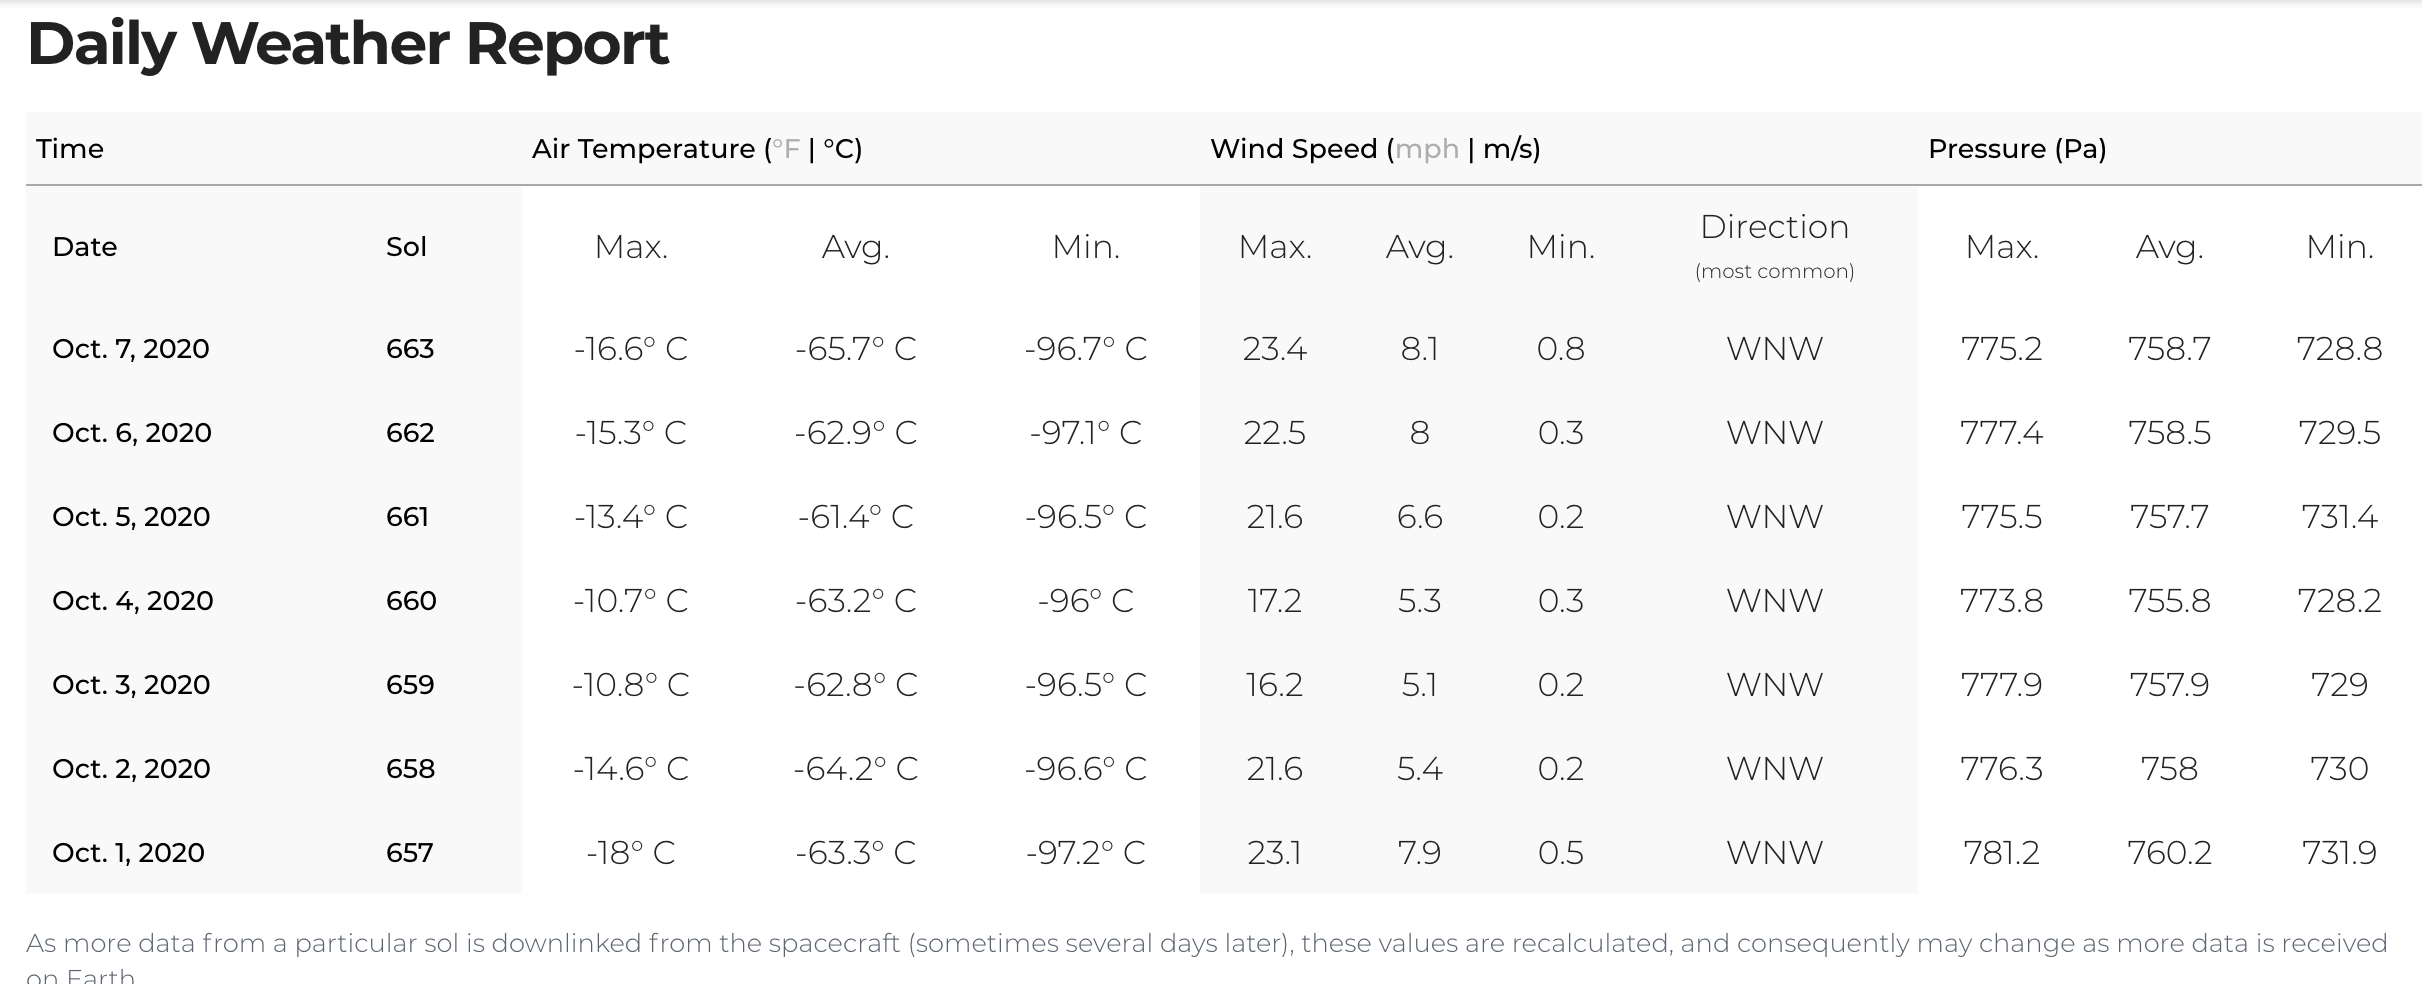

In [16]:
from IPython.display import Image
Image(filename='./assets/mars_insight_weather_screenshot.png')

The original keys

In [17]:
clean_records[-1].keys()

dict_keys(['id', 'PRE', 'Season', 'WD', 'air_temperature', 'utc_begin', 'wind_speed', 'utc_end', 'wind_directions'])

### Experiments

In [18]:

with open(os.path.join(cache_data_path, cache_data_files[0]), "r") as fp:
    test_data = json.load(fp)

In [19]:
test_data

{'239': {'AT': {'av': -68.319, 'ct': 177556, 'mn': -97.958, 'mx': -25.718},
  'First_UTC': '2019-07-29T18:52:14Z',
  'HWS': {'av': 5.268, 'ct': 79473, 'mn': 0.18600000000000003, 'mx': 20.354},
  'Last_UTC': '2019-07-30T19:31:49Z',
  'PRE': {'av': 763.78, 'ct': 887774, 'mn': 743.318, 'mx': 782.8978},
  'Season': 'winter',
  'WD': {'0': {'compass_degrees': 0.0,
    'compass_point': 'N',
    'compass_right': 0.0,
    'compass_up': 1.0,
    'ct': 151},
   '1': {'compass_degrees': 22.5,
    'compass_point': 'NNE',
    'compass_right': 0.382683432365,
    'compass_up': 0.923879532511,
    'ct': 147},
   '10': {'compass_degrees': 225.0,
    'compass_point': 'SW',
    'compass_right': -0.707106781187,
    'compass_up': -0.707106781187,
    'ct': 19045},
   '11': {'compass_degrees': 247.5,
    'compass_point': 'WSW',
    'compass_right': -0.923879532511,
    'compass_up': -0.382683432365,
    'ct': 4380},
   '12': {'compass_degrees': 270.0,
    'compass_point': 'W',
    'compass_right': -1.0,
 

In [20]:
test_data.keys()

dict_keys(['239', '240', '241', '242', '243', '244', '245', 'sol_keys', 'validity_checks'])

In [21]:
test_data['sol_keys']

['239', '240', '241', '242', '243', '244', '245']

In [22]:
test_data['validity_checks']

{'238': {'AT': {'sol_hours_with_data': [0,
    1,
    2,
    3,
    4,
    5,
    6,
    7,
    8,
    9,
    10,
    11,
    12,
    13,
    14,
    15,
    16,
    17,
    18,
    19,
    20,
    21,
    22,
    23],
   'valid': True},
  'HWS': {'sol_hours_with_data': [0,
    1,
    2,
    3,
    4,
    5,
    6,
    7,
    8,
    9,
    10,
    11,
    12,
    13,
    14,
    15,
    16,
    17,
    18,
    19,
    20,
    21,
    22,
    23],
   'valid': True},
  'PRE': {'sol_hours_with_data': [0,
    1,
    2,
    3,
    4,
    5,
    6,
    7,
    8,
    9,
    10,
    11,
    12,
    13,
    14,
    15,
    16,
    17,
    18,
    19,
    20,
    21,
    22,
    23],
   'valid': True},
  'WD': {'sol_hours_with_data': [0,
    1,
    2,
    3,
    4,
    5,
    6,
    7,
    8,
    9,
    10,
    11,
    12,
    13,
    14,
    15,
    16,
    17,
    18,
    19,
    20,
    21,
    22,
    23],
   'valid': True}},
 '239': {'AT': {'sol_hours_with_data': [0,
    1,
    2,
    3,
  

In [23]:
test_data['395'].keys()

KeyError: '395'

In [ ]:
test_data['395']['AT']

In [ ]:
test_data['395']['First_UTC']

In [ ]:
test_data['395']['HWS']

In [ ]:
test_data['395']['Last_UTC']

In [ ]:
test_data['395']['PRE']

In [ ]:
test_data['395']['Season']

In [ ]:
test_data['395']['WD']

In [ ]:
with open(os.path.join(data_path, data_files[0]), "r") as fp:
    test_data_2 = json.load(fp)

In [ ]:
test_data_2["84"]

Test the WD field

In [ ]:
df__1 = pd.DataFrame( clean_records[-1]["WD"] ).T
df__1.sort_values(by="ct", inplace=True)

In [ ]:
df__1